# Implement PageRank algorithm 

## Import package and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
%matplotlib inline  

In [27]:
df = pd.read_csv('graph.csv') #'graph_small.csv'

In [28]:
# create sparse matrix
N = len(set(np.concatenate((df['page_id_to'].unique(),df['page_id_from'].unique()), axis=None)))
values = df.groupby('page_id_from')['page_id_to'].transform(lambda x: 1/len(x))
M = csc_matrix((values, (df.page_id_to, df.page_id_from)),shape=(N, N))

In [35]:
beta = 0.8
v = np.zeros(N) + 1/N
MSE =[]

In [36]:
for i in range(25):
    '''
    Run 25 iterations of the “classical” update rule from slide 10, with Beta=0.8
    '''
    v_old = v
    #v = np.zeros(N) + (1-beta)/N
    v = beta * M * v + (1-beta)/N
    MSE.append(np.mean((v - v_old)**2))

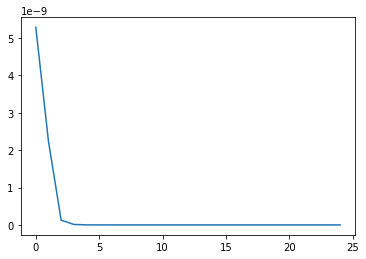

In [37]:
# Plot the MSE of the differences
plt.plot(MSE)

In [38]:
sum(v)

0.8756096381873256

Because of the deadends, we have only 87.6% of original traffic left.

## What is the maximal number of nodes of G such that your algorithm could be executed?
With 1GB RAM and the average out-degree of a graph G of 15:

Assume we can compute on $n$ nodes of G. We need space for $n$ numbers in $v$ and $15*n$ numbers in the sparse matrix. If we ignore the space needed for doing multiplication, we need space for $16*n$ numbers. $$ram = 16 * n * 64 \div 8 * 10^{-9} = 1 GB$$

In [9]:
node= 10**9 * 8 / 64 / 16
print('The maximal number of nodes of G is %6d'%(node))

The maximal number of nodes of G is 7812500
